# Logistic Regression

## Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Inisialisasi libary yang dibutuhkan, library numpy untuk operasi numerik, pandas untuk manipulasi data, dan matplotlib untuk visualisasi

## Importing the dataset

In [5]:
dataset = pd.read_csv('Social_Network_Ads.csv')

Membaca file dataset Social_Network_Ads.csv

## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, -1].values   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Memisahkan X dan Y 
X untuk data fitur(independent variabel) yang digunakan untuk memprediksi. 
Y untuk data target(dependent variabel) yang ingin diprediksi 

X disini untuk fitur bagian Age dan EstimatedSalary, Y untuk fitur Purchased

Membagi dataset antara data training dan data testing, pada codingan data testing yang dipakai sekitar 25%, data training jadi 75%.
Pada random state memastikan datanya dibagi dengan cara yang sama agar dapat memastikan hasilnya konsisten.

## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Pakai StandarScaler untuk melakukan scaling pada fitur agar berada dalam rentang yang sama secara standar.
Pakai fit_transform pada training buat menghitung standar deviasi dan menghitung rata-rata. Dan pakai transform pada testing agar dapat memiliki skala yang sama tidak perlu menghitung ulang deviasi dan rata-rata. 

## Training the Logistic Regression model on the Training set

In [8]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)



LogisticRegression(random_state=0)

Melakukan training model logistic regression dengan membuat objek pada LogisticRegression pakai data training

## Predicting a new result

In [9]:
print(classifier.predict(sc.transform([[30, 87000]]))) 


[0]


Melakukan prediksi hasil baru dengan menginput asumsi menggunakan Age nya 30 tahun dan EstimatedSalary nya 87000

## Predicting the Test set results

In [11]:
y_pred = classifier.predict(X_test)


Melakukan prediksi pada hasil test results dengan menggunakan data testing dan nyimpan hasil prediksinya pada y_pred

## Making the Confusion Matrix

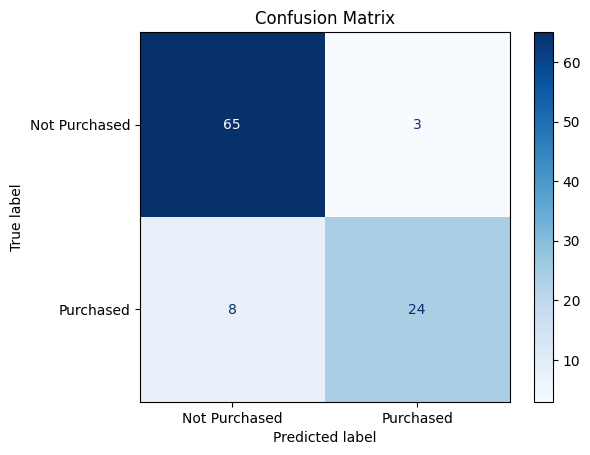

Accuracy: 0.89


In [18]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score


cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Purchased', 'Purchased'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Pada hasil Confusion Matrix terdapat:

65 TF(True Negative) pada kelas Not Purchased yang berarti ada 65 prediksi benar orang tidak membeli produk

24 TP(True Positive) pada kelas Purchased yang berarti ada 24 prediksi benar orang membeli produk

3 FS(False Positive) yang berarti ada 3 prediksi salah orang membeli produk

8 FN(False Negative) yang berarti ada 8 prediksi salah orang tidak membeli produk

Dan akurasi memperoleh 89% model dapat memprediksi benar dari seluruh data testing

## Visualising the Training set results

C:\Users\Ip3_V\AppData\Local\Temp\ipykernel_7792\1766605319.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


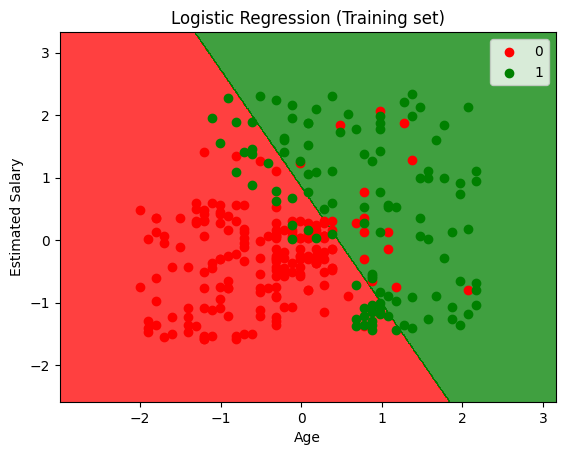

In [14]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


Pada hasil visual pada training dapat disimpulkan bahwa hasil modelnya dapat memisahkan kelas dan bekerja cukup baik pada saat training namun masih ada hasil prediksi yang salah. Karena terdapat beberapa titik merah di daerah hijau dan ada beberapa titik hijau juga di daerah merah.

## Visualising the Test set results

C:\Users\Ip3_V\AppData\Local\Temp\ipykernel_19608\885827536.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


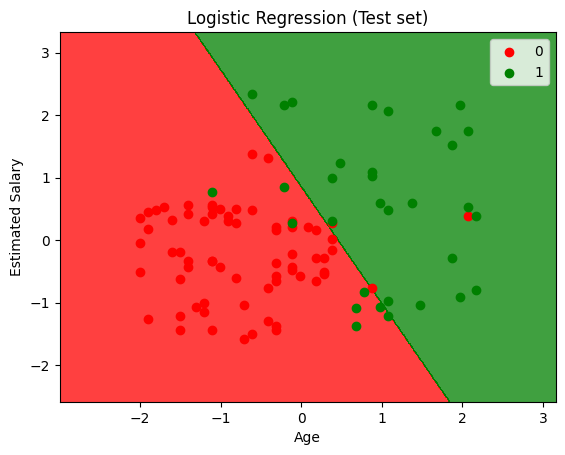

In [10]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


Pada hasil visual pada testing dapat disimpulkan bahwa hasil modelnya memisahkan kelas dan bekerja cukup baik, serta dapat bekerja cukup baik di data baru, namun masih ada kesalahan prediksi karena ada beberapa titik merah ataupun hijau berada di area kelas yang tidak sesuai.